In [1]:
#Dataset link: kaggle.com/datasets/die9origephit/children-vs-adults-images


import numpy as np
import os
import tensorflow as tf

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [28]:
categories=['adults','children']
dataset_path=os.path.join('dataset')
train_path=os.path.join('dataset','train')
test_path=os.path.join('dataset','test')

In [29]:
import cv2
import random

img_size=90
data=[]
for category in categories:
    folder=os.path.join(train_path,category)
    label=categories.index(category)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(img_size, img_size))
        img_gray = cv2.cvtColor(img_arr,cv2.COLOR_RGB2GRAY)
        data.append([img_arr, label])

random.shuffle(data)        
len(data) 

680

In [30]:
x=[]
y=[]
for feature, label in data:
    x.append(feature)
    y.append(label)

In [31]:
x= np.array(x)
y=np.array(y)
x=x/255
x.shape

(680, 90, 90, 3)

1

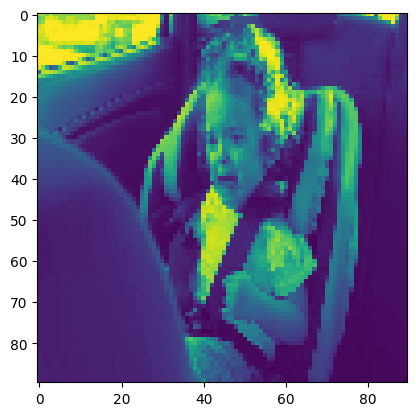

In [32]:
import matplotlib.pyplot as plt

plt.imshow(x[:,:,:,1][2])
y[2]

1

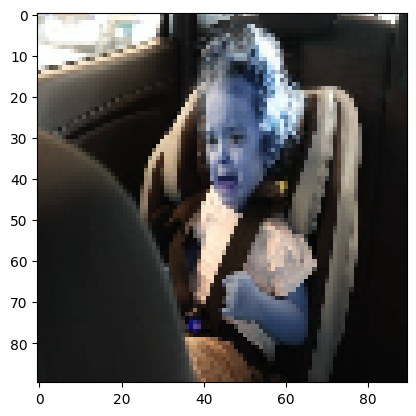

In [33]:
plt.imshow(x[2])
y[2]

In [34]:
x.shape

(680, 90, 90, 3)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [67]:
model= Sequential()

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(units=1296,activation='relu'))
model.add(Dense(units=1296,activation='relu'))
model.add(Dense(units=648,activation='relu'))
model.add(Dense(units=648,activation='relu'))
model.add(Dense(units=324,activation='relu'))
model.add(Dense(units=324,activation='relu'))
model.add(Dense(units=2,activation='softmax'))

In [68]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer='adam',
             metrics=['accuracy'])
model.build(x.shape)
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (680, 88, 88, 64)         1792      
                                                                 
 max_pooling2d_36 (MaxPoolin  (680, 44, 44, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (680, 42, 42, 32)         18464     
                                                                 
 max_pooling2d_37 (MaxPoolin  (680, 21, 21, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (680, 19, 19, 16)         4624      
                                                                 
 max_pooling2d_38 (MaxPoolin  (680, 9, 9, 16)        

In [69]:
hist=model.fit(x,y,epochs=10,validation_split=0.2)

Epoch 1/10
17/17 [==============================] - 2s 52ms/step - loss: 0.7024 - accuracy: 0.5257 - val_loss: 0.6986 - val_accuracy: 0.4412
Epoch 2/10
17/17 [==============================] - 0s 22ms/step - loss: 0.6933 - accuracy: 0.5092 - val_loss: 0.6910 - val_accuracy: 0.5588
Epoch 3/10
17/17 [==============================] - 0s 22ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6949 - val_accuracy: 0.4412
Epoch 4/10
17/17 [==============================] - 0s 22ms/step - loss: 0.6929 - accuracy: 0.5147 - val_loss: 0.6982 - val_accuracy: 0.4412
Epoch 5/10
17/17 [==============================] - 0s 22ms/step - loss: 0.6927 - accuracy: 0.5147 - val_loss: 0.6981 - val_accuracy: 0.4412
Epoch 6/10
17/17 [==============================] - 0s 22ms/step - loss: 0.6916 - accuracy: 0.5147 - val_loss: 0.7000 - val_accuracy: 0.4412
Epoch 7/10
17/17 [==============================] - 0s 22ms/step - loss: 0.6705 - accuracy: 0.5239 - val_loss: 0.7128 - val_accuracy: 0.5074
Epoch 8/10
17

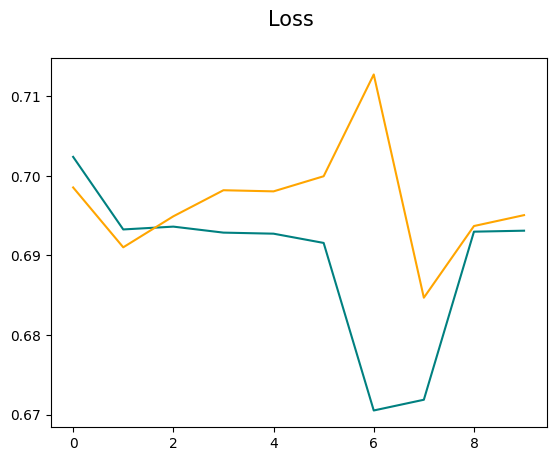

In [70]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange', label='loss')
fig.suptitle('Loss', fontsize=15)
plt.show()

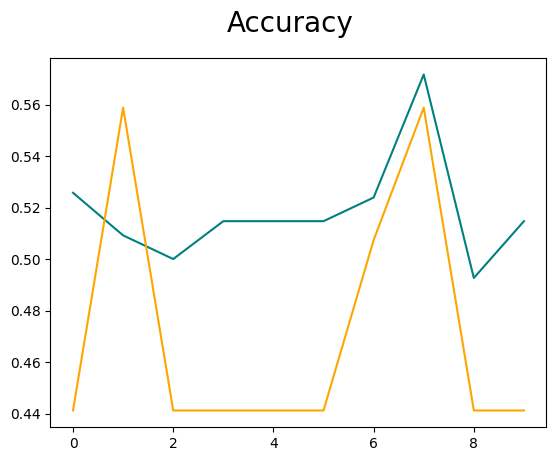

In [72]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.show()